In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# import spectroscopy data 
X = pd.read_csv('RamanSpectra.csv', header=None).to_numpy()            #Spectra
y = pd.read_csv('RamanConcentrations.csv', header=None).to_numpy()     #Concentrations
S = pd.read_csv('RamanShifts.csv', header=None).to_numpy()             #Raman Shifts
Species = ['Kyanite','Wollastonite','Olivine','Silica','Zircon'] # different insoluble GFCs for raman spec. 


In [4]:
X

array([[ 3010.85522461,  3009.37231445,  3004.17358398, ...,
         6698.14453125,  6703.19042969,  6709.94921875],
       [ 3419.99682617,  3437.38305664,  3454.46362305, ...,
         6080.75390625,  6081.29541016,  6090.33447266],
       [ 6167.03271484,  6174.61083984,  6182.71777344, ...,
        12224.12695312, 12219.92773438, 12223.38867188],
       ...,
       [10075.296875  , 10126.30371094, 10174.89550781, ...,
        19113.61132812, 19098.78125   , 19091.16210938],
       [17954.1953125 , 17991.1328125 , 18033.67382812, ...,
        28507.82617188, 28455.74804688, 28397.19140625],
       [19275.12109375, 19316.15039062, 19374.52148438, ...,
        28427.82226562, 28338.61328125, 28241.74804688]])

In [5]:
y

array([[  5.86021043,   5.9225531 ,   0.        ,  51.99378193,
          0.        ],
       [  6.37757871,  20.35397462,  11.39822578,  17.97934424,
          9.29498174],
       [  7.08647908,  22.61642261,   0.        ,  25.33039332,
         10.32816633],
       [  7.3894823 ,   6.85206541,   4.36651227,  42.65746601,
          3.69474115],
       [  9.55537419,   0.        ,   0.        ,  31.33687932,
          8.13097058],
       [ 12.24990999,  26.31521125,  11.41988857,  70.00729663,
          9.31264722],
       [ 13.12399708,   8.5707736 ,   4.48626431,  32.74303352,
          4.21842763],
       [ 14.32968074,  29.00163488,   4.36651227,  67.46498382,
         13.80971121],
       [ 18.38198473,   0.        ,  10.87385012,  27.24935061,
          0.        ],
       [ 18.55883661,   0.        ,  10.97846673,  25.02829022,
          5.16249328],
       [ 18.97309107,  14.482092  ,   4.48626431,  84.63818664,
          4.21842763],
       [ 19.39341515,  19.39341515,   0.   

In [6]:
# check dimensions
X.shape, y.shape, S.shape

((66, 1601), (66, 5), (1601, 1))

Text(0.5, 1.0, 'Raman Spectroscopy')

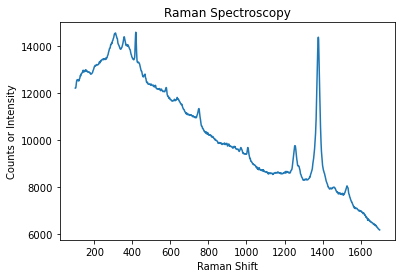

In [7]:
# plot of raman spectrum without filter
plt.plot(S, X[2, :])
plt.xlabel("Raman Shift")
plt.ylabel("Counts or Intensity")
plt.title("Raman Spectroscopy")

Text(0.5, 1.0, 'Raman Spectroscopy')

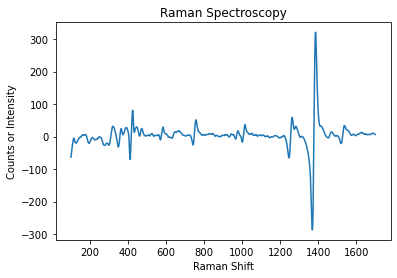

In [8]:
# plot of raman spectrum with SG filter
plt.plot(S, signal.savgol_filter(X[2, :], window_length = 19, polyorder = 2, deriv = 1))
plt.xlabel("Raman Shift")
plt.ylabel("Counts or Intensity")
plt.title("Raman Spectroscopy")

In [9]:
# test train split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Step 2: Prepare the dataset 
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = X_train  # training spectra data 
output_data_np = y_train[:, 1]   # training concentration data for one compound

# convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()}")

# Step 7: Testing and evaluation 
test_input_np = X_test  # test input
# convert to tensor 
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# 'predictions' now contains the predicted intensities
print(predictions)

Epoch [1/100] Loss: 475896128.0
Epoch [2/100] Loss: 83693024.0
Epoch [3/100] Loss: 10249386.0
Epoch [4/100] Loss: 11786706.0
Epoch [5/100] Loss: 13681510.0
Epoch [6/100] Loss: 25948.26953125
Epoch [7/100] Loss: 8149027.0
Epoch [8/100] Loss: 2781534.5
Epoch [9/100] Loss: 286384.59375
Epoch [10/100] Loss: 2782961.25
Epoch [11/100] Loss: 934093.6875
Epoch [12/100] Loss: 461151.59375
Epoch [13/100] Loss: 2161088.0
Epoch [14/100] Loss: 82673.890625
Epoch [15/100] Loss: 743655.4375
Epoch [16/100] Loss: 489972.25
Epoch [17/100] Loss: 6978.9736328125
Epoch [18/100] Loss: 383915.71875
Epoch [19/100] Loss: 170480.65625
Epoch [20/100] Loss: 86127.75
Epoch [21/100] Loss: 177340.4375
Epoch [22/100] Loss: 10483.9365234375
Epoch [23/100] Loss: 96554.7734375
Epoch [24/100] Loss: 105397.2265625
Epoch [25/100] Loss: 10640.912109375
Epoch [26/100] Loss: 72783.28125
Epoch [27/100] Loss: 13364.2802734375
Epoch [28/100] Loss: 43062.96875
Epoch [29/100] Loss: 19585.8828125
Epoch [30/100] Loss: 6640.915039062

In [46]:
print(y_test[:,1].reshape(len(y_test), 1))

[[86.45707527]
 [ 0.        ]
 [41.9646501 ]
 [22.61642261]
 [41.9646501 ]
 [98.7156423 ]
 [51.536643  ]
 [42.3471274 ]
 [88.61187665]
 [28.76654252]
 [28.76654252]
 [ 0.        ]
 [88.61187665]
 [45.71250353]]


In [44]:
mean_squared_error(y_test[:, 1], np.array(predictions))

1073.5972363761905

In [47]:
# same neural network but with fliter added to the data 

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Step 2: Prepare the dataset 
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train, window_length = 19, polyorder = 2, deriv = 1)  # training spectra data with SG filter 
output_data_np = y_train[:, 1]   # training concentration data for one compound

# convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()}")

# Step 7: Testing and evaluation 
test_input_np = signal.savgol_filter(X_test, window_length = 19, polyorder = 2, deriv = 1)  # Replace with your actual test input
# convert to tensor 
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# 'predictions' now contains the predicted intensities
print(predictions)

/Users/amoghashwath/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/amoghashwath/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/100] Loss: 986.9798583984375
Epoch [2/100] Loss: 1091.2789306640625
Epoch [3/100] Loss: 862.7583618164062
Epoch [4/100] Loss: 643.2787475585938
Epoch [5/100] Loss: 873.9405517578125
Epoch [6/100] Loss: 1032.28271484375
Epoch [7/100] Loss: 766.6925659179688
Epoch [8/100] Loss: 873.0942993164062
Epoch [9/100] Loss: 949.5335693359375
Epoch [10/100] Loss: 912.5022583007812
Epoch [11/100] Loss: 750.74560546875
Epoch [12/100] Loss: 669.1273193359375
Epoch [13/100] Loss: 801.2003784179688
Epoch [14/100] Loss: 793.104736328125
Epoch [15/100] Loss: 658.4801025390625
Epoch [16/100] Loss: 830.7528686523438
Epoch [17/100] Loss: 1182.6280517578125
Epoch [18/100] Loss: 705.0610961914062
Epoch [19/100] Loss: 829.532958984375
Epoch [20/100] Loss: 1026.0823974609375
Epoch [21/100] Loss: 727.3958740234375
Epoch [22/100] Loss: 1072.796875
Epoch [23/100] Loss: 796.0704956054688
Epoch [24/100] Loss: 1032.10107421875
Epoch [25/100] Loss: 946.7142333984375
Epoch [26/100] Loss: 733.993896484375
Epoch

In [48]:
print(y_test[:,1].reshape(len(y_test), 1))

[[86.45707527]
 [ 0.        ]
 [41.9646501 ]
 [22.61642261]
 [41.9646501 ]
 [98.7156423 ]
 [51.536643  ]
 [42.3471274 ]
 [88.61187665]
 [28.76654252]
 [28.76654252]
 [ 0.        ]
 [88.61187665]
 [45.71250353]]


In [49]:
mean_squared_error(y_test[:, 1], np.array(predictions))

1069.2282628689122

Same NN code with scaling


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn

# Step 2: Prepare the dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# 'input_data' and 'output_data' into the neural net
input_data_np = signal.savgol_filter(X_train, window_length=19, polyorder=2, deriv=1)  # training spectra data with SG filter
output_data_np = y_train[:, 1]  # training concentration data for one compound

# Standard scaling for input data
input_scaler = StandardScaler()
input_data_np = input_scaler.fit_transform(input_data_np)

# Standard scaling for output data
output_scaler = StandardScaler()
output_data_np = output_scaler.fit_transform(output_data_np.reshape(-1, 1))

# Convert to torch tensor
input_data = torch.tensor(input_data_np, dtype=torch.float32)
output_data = torch.tensor(output_data_np, dtype=torch.float32)

# Step 3: Create DataLoader
batch_size = 32
dataset = CustomDataset(input_data, output_data)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Step 4: Create the neural network architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(1601, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.fc1(x))
        x = nn.LeakyReLU(0.2)(self.fc2(x))
        x = nn.LeakyReLU(0.2)(self.fc3(x))
        x = self.fc4(x)
        return x

model = MyModel()

# Step 5: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 6: Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item()}")

# Step 7: Testing and evaluation
test_input_np = signal.savgol_filter(X_test, window_length=19, polyorder=2, deriv=1)  # Replace with your actual test input

# Standard scaling for test input
test_input_np = input_scaler.transform(test_input_np)

# Convert to tensor
test_input = torch.tensor(test_input_np, dtype=torch.float32)

with torch.no_grad():
    predictions = model(test_input)

# Inverse transform the scaled predictions to get the actual values
predictions = output_scaler.inverse_transform(predictions)

# 'predictions' now contains the predicted intensities
print(predictions)


Epoch [1/100] Loss: 0.4826604425907135
Epoch [2/100] Loss: 0.24779942631721497
Epoch [3/100] Loss: 0.10012616962194443
Epoch [4/100] Loss: 0.16450127959251404
Epoch [5/100] Loss: 0.1911570280790329
Epoch [6/100] Loss: 0.12020331621170044
Epoch [7/100] Loss: 0.06756937503814697
Epoch [8/100] Loss: 0.08362814784049988
Epoch [9/100] Loss: 0.0761345848441124
Epoch [10/100] Loss: 0.055612653493881226
Epoch [11/100] Loss: 0.0270213782787323
Epoch [12/100] Loss: 0.032648034393787384
Epoch [13/100] Loss: 0.0428505539894104
Epoch [14/100] Loss: 0.019756045192480087
Epoch [15/100] Loss: 0.027126088738441467
Epoch [16/100] Loss: 0.013539289124310017
Epoch [17/100] Loss: 0.015875592827796936
Epoch [18/100] Loss: 0.006924372166395187
Epoch [19/100] Loss: 0.004394670482724905
Epoch [20/100] Loss: 0.010832863859832287
Epoch [21/100] Loss: 0.005543375853449106
Epoch [22/100] Loss: 0.007708014454692602
Epoch [23/100] Loss: 0.0033096205443143845
Epoch [24/100] Loss: 0.005015096161514521
Epoch [25/100] L

In [18]:
print(y_test[:,1].reshape(len(y_test), 1))

[[86.45707527]
 [ 0.        ]
 [41.9646501 ]
 [22.61642261]
 [41.9646501 ]
 [98.7156423 ]
 [51.536643  ]
 [42.3471274 ]
 [88.61187665]
 [28.76654252]
 [28.76654252]
 [ 0.        ]
 [88.61187665]
 [45.71250353]]


In [19]:
mean_squared_error(y_test[:, 1], np.array(predictions))

67.28318007119603

In [20]:
print(y_train)

[[ 43.10854372  20.24864123  33.08693934  72.38500097   9.2468795 ]
 [ 81.41331509  16.96983774  41.67119232 142.03264183  18.67217124]
 [ 70.61786546  63.50971093  10.90994409 158.39554513  41.72997449]
 [  7.3894823    6.85206541   4.36651227  42.65746601   3.69474115]
 [ 54.23282001  50.91104935   4.4826779   76.74780524   4.21505533]
 [ 38.7350349   47.71970859  20.33297692 198.01245586  17.27786329]
 [ 18.97309107  14.482092     4.48626431  84.63818664   4.21842763]
 [ 80.24464358  57.91103639  19.8651209  147.69533324   7.98955815]
 [ 31.64720227  45.71250353  11.41988857  91.24869768   9.31264722]
 [ 54.03529993  51.536643    15.2347388  114.62672736  18.92036535]
 [ 92.75497535  18.98794955  32.33753489 162.01671524  21.35798152]
 [ 29.12359399  19.39341515   0.          53.14730705   8.2797174 ]
 [ 73.8177963   82.0554197   19.62707803 171.46698314  33.15534058]
 [ 73.56423883  99.78656141  15.88000831 171.93841236  23.81983052]
 [ 68.42078307   8.48491887  37.22986759 109.617